In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src/')
import wave as w
import utils as ut
import plotter
import numba_functions as nbf
import numba as nb
from copy import deepcopy
from scipy.optimize import brentq
import pickle

In [22]:
def build_assay_wave(id_, r0, D, alpha, beta, gamma=0.5, cutoff=1):
    dx = ut.lin_from_two_log_points(r0, 0.5, 0.08, 100, 0.6)
    dt = ut.dt_from_cfl(0.02, D, dx)

    p = w.Vwave_pars(id_, tot_time=50000, dt=dt, dx=dx, 
                     n_x_bins=int( ut.lin_from_two_points(r0, 0.5, 250, 100, 10000)/dx ), 
                     M=5, r0=r0, D_coef=D, beta=beta, alpha=alpha, gamma=gamma,
                     Nh=10**10, N0=10**8, cutoff=cutoff,
                     t_burn=ut.lin_from_two_points(r0, 0.5, 5000, 50, 600000), 
                     t_burn_cutoff=ut.lin_from_two_points(r0, 0.5, 200, 50, 10000), 
                     back_width_fract=ut.lin_from_two_log_points(r0, 0.5, 0.5, 50, 3),
                     traj_step=int(50/dt), check_step=int(0/dt), traj_after_burn=True, verbose=True)
    return w.Vwave(p)

## FKPP regime

In [23]:
r0 = 0.5
D_coef = 0.5e-3
gamma = 0.05
beta0 = 0.5
a_list = np.linspace(0.06, 0.065, 20)
b_list = np.sqrt(a_list)*beta0

In [ ]:
assays = []
for i in range(len(a_list)):
    assays.append(build_assay_wave(i, r0, D_coef, a_list[i], b_list[i], gamma))

In [25]:
waves = ut.multiprocess_sim(assays, 3)

Process 0:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 2:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 1:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 3:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 4:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 5:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 6:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 7:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 8:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 9:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 10:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 11:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 12:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 13:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 14:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 15:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 16:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 17:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 18:   0%|          | 0/214843 [00:00<?, ?it/s]

Process 19:   0%|          | 0/214843 [00:00<?, ?it/s]

In [26]:
speeds = []
for i in range(len(a_list)):
    speeds.append(np.mean(waves[i].traj.speed(200)[:]))

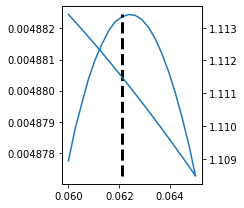

In [27]:
fig, ax1 = plt.subplots(figsize=(3.5,3))
ax2 = plt.twinx(ax1)

ax1.plot(a_list, speeds)
ax1.plot(np.ones(2)*0.06210757493071612, [min(speeds), max(speeds)], c='k', ls='--', lw=3)

ax2.plot(a_list, beta0*np.sqrt(a_list)/(a_list+gamma))
plt.tight_layout()

In [28]:
f = open('data/speed_R0_vs_alpha_FKPP.tsv', 'w')

header = '#D\tspeed\tR0\n'
f.write(header)

for i in range(len(a_list)):
    f.write(str(a_list[i]) + '\t')
    f.write(str(speeds[i]) + '\t')
    f.write(str(beta0*np.sqrt(a_list[i])/(a_list[i]+gamma)) + '\t')
    f.write('\n')
    
f.close()


f = open('data/speed_R0_vs_alpha_FKPP_pars.tsv', 'w')

header = '#parameter\tvalue\n'
f.write(header)

f.write('D\t' + str(waves[0].p.D_coef) + '\n')
f.write('beta0\t' + str(waves[0].p.beta) + '\n')
f.write('alpha\t' + str(waves[0].p.alpha) + '\n')
f.write('gamma\t' + str(waves[0].p.gamma) + '\n')
f.write('Nh\t' + str(waves[0].p.Nh) + '\n')
f.write('M\t' + str(waves[0].p.M) + '\n')
f.write('cutoff\t' + str(waves[0].p.cutoff) + '\n')

f.close()

## linear-fitness regime

In [7]:
r0 = 75.66
a_list2 = np.linspace(0.0502, 0.055, 20)
b_list2 = np.sqrt(a_list2)*beta0

In [8]:
assays = []
for i in range(len(a_list2)):
    assays.append(build_assay_wave(i, r0, D_coef, a_list2[i], b_list2[i], gamma))

In [ ]:
waves2 = ut.multiprocess_sim(assays, 4)

In [10]:
speeds2 = []
for i in range(len(a_list2)):
    speeds2.append(np.mean(waves2[i].traj.speed(50)[300:]))

In [13]:
len(waves2[i].traj.speed(1000))

4082

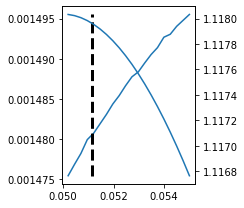

In [14]:
fig, ax1 = plt.subplots(figsize=(3.5,3))
ax2 = plt.twinx(ax1)

ax1.plot(a_list2, speeds2)
ax1.plot(np.ones(2)*0.05112595680039541, [min(speeds2), max(speeds2)], c='k', ls='--', lw=3)

ax2.plot(a_list2, beta0*np.sqrt(a_list2)/(a_list2+gamma))
plt.tight_layout()

In [29]:
f = open('data/speed_R0_vs_alpha_linfit.tsv', 'w')

header = '#D\tspeed\tR0\n'
f.write(header)

for i in range(len(a_list2)):
    f.write(str(a_list2[i]) + '\t')
    f.write(str(speeds2[i]) + '\t')
    f.write(str(beta0*np.sqrt(a_list2[i])/(a_list2[i]+gamma)) + '\t')
    f.write('\n')
    
f.close()


f = open('data/speed_R0_vs_alpha_linfit_pars.tsv', 'w')

header = '#parameter\tvalue\n'
f.write(header)

f.write('D\t' + str(waves2[0].p.D_coef) + '\n')
f.write('beta0\t' + str(waves2[0].p.beta) + '\n')
f.write('alpha\t' + str(waves2[0].p.alpha) + '\n')
f.write('gamma\t' + str(waves2[0].p.gamma) + '\n')
f.write('Nh\t' + str(waves2[0].p.Nh) + '\n')
f.write('M\t' + str(waves2[0].p.M) + '\n')
f.write('cutoff\t' + str(waves2[0].p.cutoff) + '\n')

f.close()